<a href="https://colab.research.google.com/github/vkthakur90/Econometrics/blob/main/Design_of_Experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt
from itertools import combinations

In [2]:
def get_full_factorial_design(num_factors, num_levels):
    """
    Generate a full factorial design, center it, and scale to integer values.

    - The design is generated with levels 0,1,...,num_levels-1.
    - It is centered by subtracting (num_levels - 1)/2.
    - If num_levels is even (so the centered values are half-integers),
      the design is multiplied by 2 to obtain integers.
    - If num_levels is odd, no additional scaling is needed.
    """
    design = (np.mgrid[tuple(slice(0, num_levels) for _ in range(num_factors))]
            .T.reshape(-1, num_factors))

    center = (num_levels - 1) / 2.0
    centered = design - center

    # If num_levels is even, centered values are half integers; scale by 2.
    scale_factor = 1 if num_levels % 2 != 0 else 2
    design_matrix = centered * scale_factor

    col_names = [f'F{i+1}' for i in range(num_factors)]
    design_df = pd.DataFrame(design_matrix, columns=col_names)

    return design_df

In [3]:
def add_interactions(df):
    """
    Given a DataFrame and a list of factor column names, compute all
    higher order interactions (order 2 up to len(factor_columns)).
    Returns a DataFrame where each column is the product of a combination
    of the specified columns, with the column name as "Factor1:Factor2[:...]"
    indicating the interaction.
    """
    interactions = {}
    factor_columns = df.columns.tolist()
    for r in range(2, len(factor_columns)+1):
        for cols in combinations(factor_columns, r):
            # Name for the interaction column (e.g., "F1:F2" for two factors)
            col_name = ":".join(cols)
            # Compute the product across the selected columns
            interactions[col_name] = df[list(cols)].prod(axis=1)
    return pd.DataFrame(interactions)

In [4]:
def get_full_design(num_factors, num_levels):
    main = get_full_factorial_design(num_factors, num_levels)
    interaction = add_interactions(main)
    return  pd.concat([main, interaction], axis=1)

In [5]:
full_design_df = get_full_design(5, 2)
full_design_df.columns = [f'X_{idx + 1}' for idx, _ in enumerate(full_design_df.columns)]

In [6]:
full_design_df = full_design_df.iloc[:, :8]

In [7]:
params = 10 +  3 * pd.Series(np.random.normal(size=full_design_df.shape[1]), index = full_design_df.columns)
factors_final = len(params)

In [8]:
final_design_df = full_design_df.copy()

In [9]:
final_design_df['Y'] = full_design_df @ params + 10

In [10]:
factors_final

8

In [11]:
final_design_df

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,Y
0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-24.948249
1,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-67.789272
2,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,-16.165395
3,1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-40.951141
4,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,-25.447319
5,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-12.065374
6,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-16.664465
7,1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,14.772757
8,-1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,-16.235769
9,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-12.151090


In [12]:
t_test_df = pd.DataFrame({f'X_{idx + 1}' : (
    final_design_df.groupby(f'X_{idx + 1}').agg(
         mu=('Y', 'mean'),
         sigma=('Y', 'std'),
         n=('Y', 'count')
    ).reset_index().eval(
        'sigma_sq_by_n = sigma ** 2'
    ).eval(
         'effect_sigma = sqrt(sigma_sq_by_n.sum())'
    ).eval(
        f'X_mu = X_{idx + 1} * mu'
    ).eval(
        'effect = X_mu.sum()'
    )[['effect', 'effect_sigma']].loc[1]
) for idx in range(factors_final)}).T

alpha = 0.05
dfree = len(full_design_df) - 2
t_crit = t.ppf(1 - alpha/2, dfree)

t_test_df.eval('low_ci = effect - @t_crit * effect_sigma', inplace = True)
t_test_df.eval('high_ci = effect + @t_crit * effect_sigma', inplace = True)

t_test_df['err_lower'] = t_test_df['effect'] - t_test_df['low_ci']
t_test_df['err_upper'] = t_test_df['high_ci'] - t_test_df['effect']

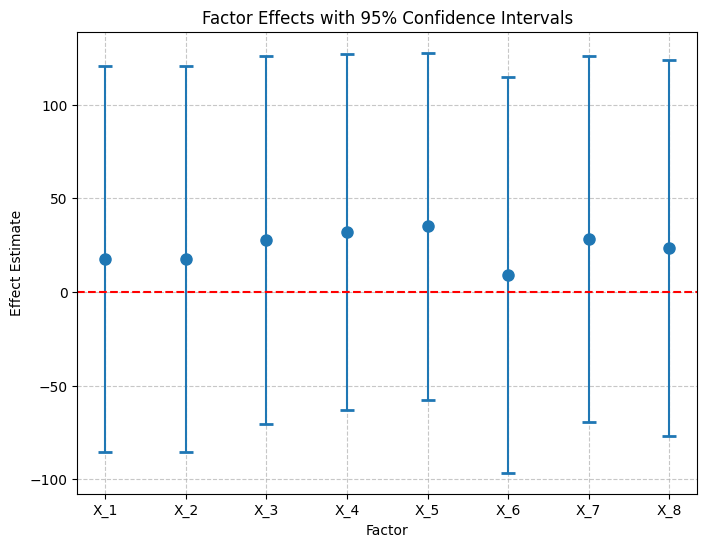

In [13]:
plt.figure(figsize=(8, 6))
plt.errorbar(
    x=t_test_df.index,
    y=t_test_df['effect'],
    yerr=[t_test_df['err_lower'], t_test_df['err_upper']],
    fmt='o', capsize=5, capthick=2, markersize=8, color='tab:blue'
)
plt.xlabel('Factor')
plt.ylabel('Effect Estimate')
plt.title('Factor Effects with 95% Confidence Intervals')
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(0, color = 'red', linestyle = '--')
plt.show()